# Import Relevent Libraries

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings

In [37]:
warnings.filterwarnings('ignore')
cwd = os.getcwd()
pd.set_option('display.max_rows',100000)

# Importing the data 

In [38]:
df = pd.read_csv('All practice jupyter notebooks/suicide_rate.csv/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [39]:
df.rename(columns = {' gdp_for_year ($) ':'gdp_year'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_year            27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [40]:
# dropping country_year column
df.drop('country-year',axis = 1,inplace = True)

## Visualization of Data

#### 1. Total number of Suicides Country-wise

In [41]:
suicides_per_country = df.groupby('country').sum('suicides_no').reset_index().sort_values('suicides_no',ascending = False)
suicides_per_country = suicides_per_country[['country','suicides_no']]
suicides_per_country.head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


[Text(0, 0, 'Russian Federation'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'Japan'),
 Text(3, 0, 'France'),
 Text(4, 0, 'Ukraine'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Republic of Korea'),
 Text(7, 0, 'Brazil'),
 Text(8, 0, 'Poland'),
 Text(9, 0, 'United Kingdom')]

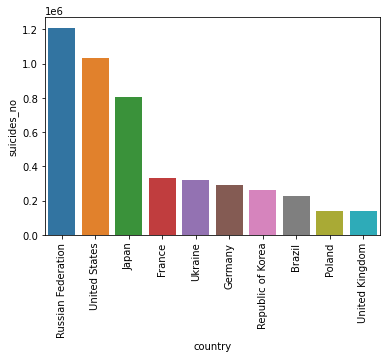

In [42]:
barplot_1 = sns.barplot('country','suicides_no',data = suicides_per_country[:10])
barplot_1.set_xticklabels(suicides_per_country['country'][:10], rotation=90)

#### Observation:-
####    1. Most number of suicides occur in Russian Federation followed by United States
####    2. It can be misleading as they also have bigger/larger Population.
####    3. To Further Analyze we can find the suicide_no/country population

## 2. Suicide Rate per country 

In [43]:
# Finding total suicide rate per countries population
total_suicide = df.groupby(['country','year'])['suicides_no'].sum()
total_popu = df.groupby(['country','year'])['population'].sum()
percentage_suicide = (total_suicide/total_popu)
percen = percentage_suicide.reset_index().rename(columns = {0:'percen'})
percen = percen.groupby('country')['percen'].mean().reset_index().sort_values('percen',ascending = False)

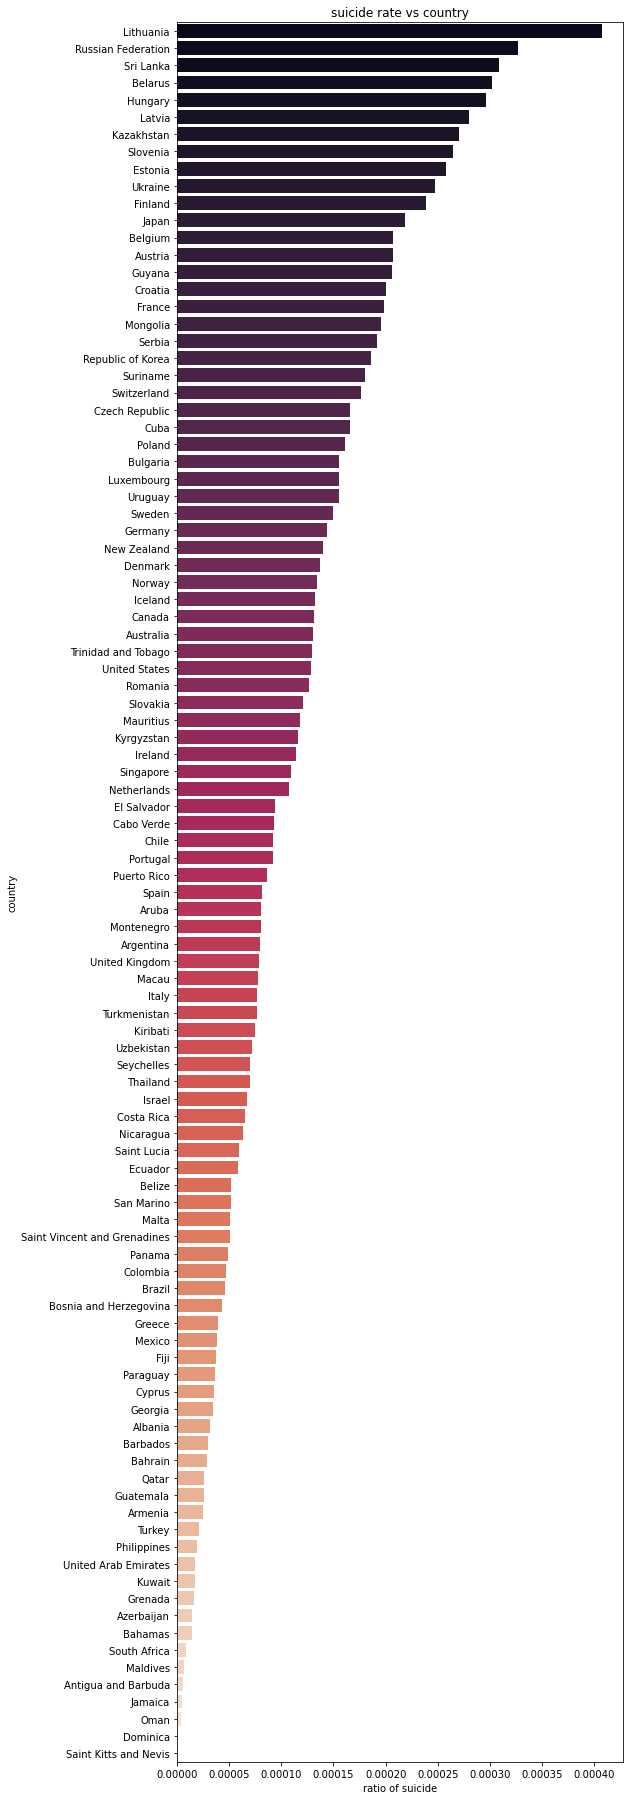

In [44]:
plt.figure(figsize=(8,32))
sns.barplot(x=percen['percen'],y=percen['country'], palette="rocket")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

## 3. Suicides per Generations 

In [45]:
suicides_per_gen = df.groupby('generation').sum('suicides_no').reset_index().sort_values('suicides_no',ascending = False)
suicides_per_gen = suicides_per_gen[['generation','suicides_no']]
suicides_per_gen.head()

,generation,suicides_no
0,Boomers,2284498
5,Silent,1781744
2,Generation X,1532804
4,Millenials,623459
1,G.I. Generation,510009


[Text(0, 0, 'Boomers'),
 Text(1, 0, 'Silent'),
 Text(2, 0, 'Generation X'),
 Text(3, 0, 'Millenials'),
 Text(4, 0, 'G.I. Generation'),
 Text(5, 0, 'Generation Z')]

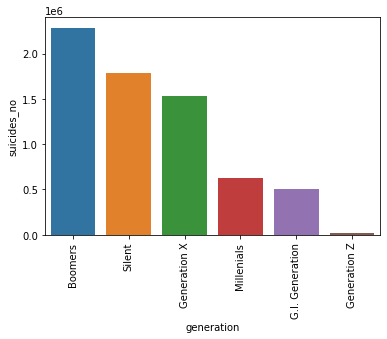

In [46]:
barplot_2 = sns.barplot('generation','suicides_no',data = suicides_per_gen[:10])
barplot_2.set_xticklabels(suicides_per_gen['generation'][:10], rotation=90)

### Observation:-
####   Boomers have the highest suicide number, followed by silent generation and  generation x and millenials

## Suicides Per Age group

In [47]:
suicides_by_age_group = df.groupby('age').sum('suicide_no').reset_index().sort_values('suicides_no',ascending = 0)
suicides_by_age_group = suicides_by_age_group[['age','suicides_no']]
suicides_by_age_group

,age,suicides_no
2,35-54 years,2452141
4,55-74 years,1658443
1,25-34 years,1123912
0,15-24 years,808542
5,75+ years,653118
3,5-14 years,52264


[Text(0, 0, '35-54 years'),
 Text(1, 0, '55-74 years'),
 Text(2, 0, '25-34 years'),
 Text(3, 0, '15-24 years'),
 Text(4, 0, '75+ years'),
 Text(5, 0, '5-14 years')]

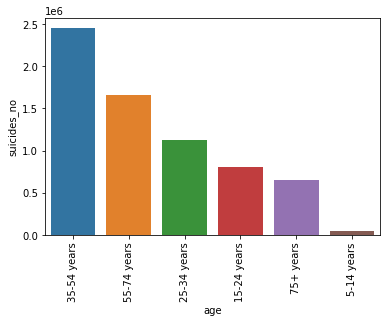

In [48]:
barplot_3 = sns.barplot('age','suicides_no',data = suicides_by_age_group[:10])
barplot_3.set_xticklabels(suicides_by_age_group['age'][:10], rotation=90)

### Observation:- Age group Shows the same trend levels as generation which is self explanatory

## 4. Gender Discrimination against Suicides across the Globe

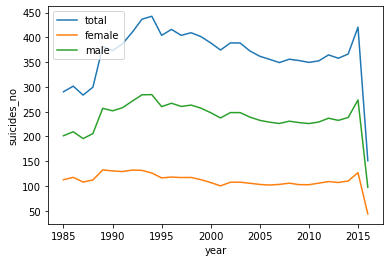

In [49]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
sns.lineplot(df.year, df.suicides_no, ci = None)
plt.legend(['total','female', 'male'])
plt.show()

In [50]:
df_year = df.groupby('year').sum('suicides_no').reset_index()
df_year = df_year[['year','suicides_no']]
df_year = df_year[df_year['year']<2015]

df_men = df_men.groupby('year').sum('suicides_no').reset_index()
df_men = df_men[['year','suicides_no']]
df_men = df_men[df_men['year']<2015]

df_women = df_women.groupby('year').sum('suicides_no').reset_index()
df_women = df_women[['year','suicides_no']]
df_women = df_women[df_women['year']<2015]

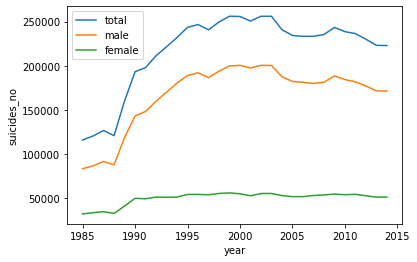

In [51]:
sns.lineplot('year','suicides_no',data=df_year,ci = None)
sns.lineplot('year','suicides_no',data=df_men,ci = None)
sns.lineplot('year','suicides_no',data=df_women,ci = None)
plt.legend(['total','male', 'female'])
plt.show()

### Observation :- 
`1. Men commit more suicides than women do across the world.`

`2. This shows poor mental condition of men in every successive younger generation.`

`3. Suicide number for women is a horizontal line showing that their is no significant increase in suicides.`

## 5. Relationship between Human Devlopment Index and Suicides Rates

In [52]:
df_hdi = df[~df['HDI for year'].isnull()]
df_hdi.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_year,gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,0.619,"2,424,499,009",835,Generation X


In [53]:
# Finding total suicide rate per countries population
total_suicide = df_hdi.groupby(['country','year'])['suicides_no'].sum()
total_popu = df_hdi.groupby(['country','year'])['population'].sum()
percentage_suicide = (total_suicide/total_popu)
percen = percentage_suicide.reset_index().rename(columns = {0:'percen'})
percen = percen.groupby('country')['percen'].mean().reset_index().sort_values('percen',ascending = False)
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0.1,0.9))
percen['percen']=minmax.fit_transform(percen['percen'].values.reshape(-1,1))

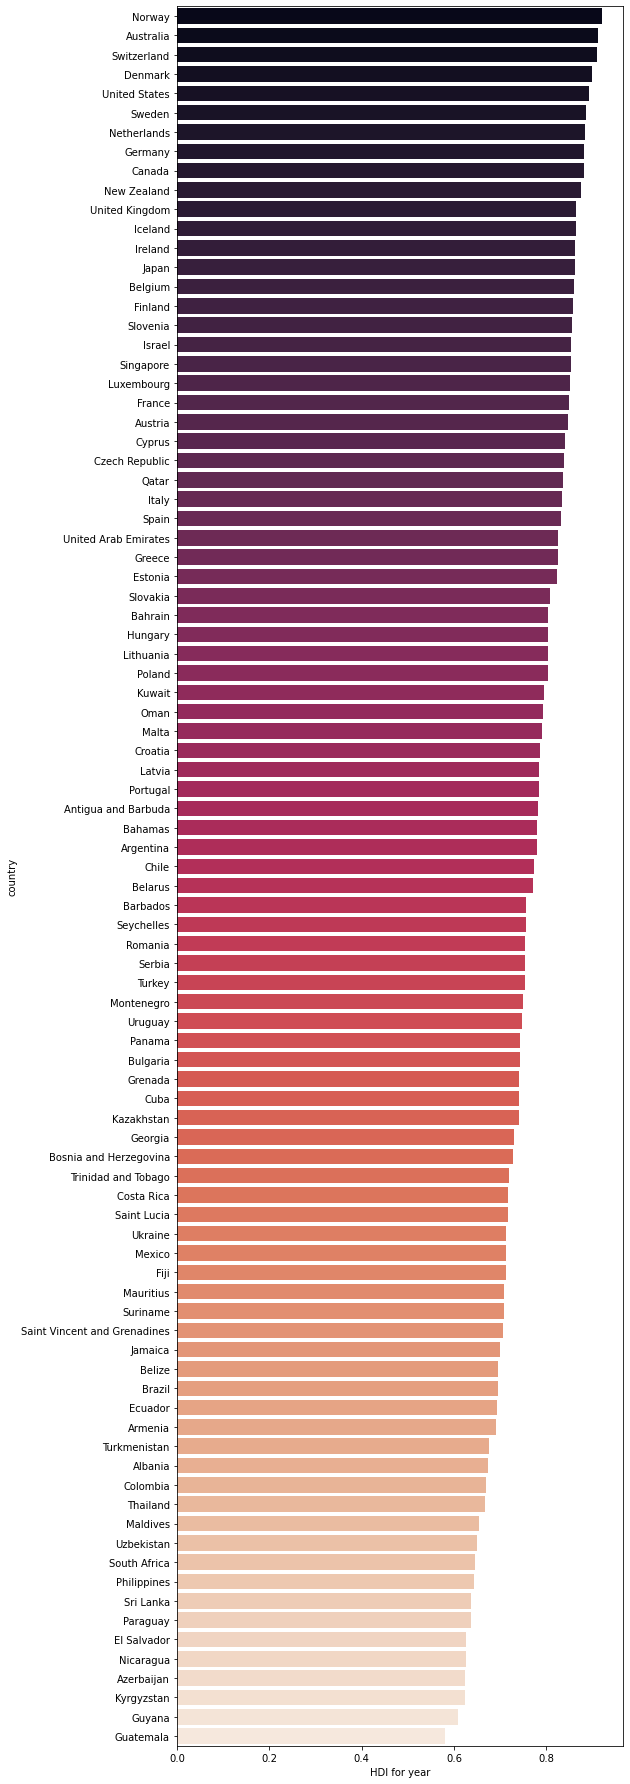

In [54]:
# PLotting HDI of country 
df_hdi_value = df_hdi.groupby('country')['HDI for year'].mean().reset_index().sort_values('HDI for year',ascending = False)
plt.figure(figsize =(8,32))
sns.barplot(df_hdi_value['HDI for year'],df_hdi_value['country'],palette = 'rocket')
plt.show()

In [64]:
hdi_suicides = pd.merge(percen,df_hdi_value,how='left',on= 'country')
hdi_suicides.columns = ['country', 'Suicide_rate', 'HDI for year']

In [65]:
hdi_suicides.corr()

,Suicide_rate,HDI for year
Suicide_rate,1.000000,0.255194
HDI for year,0.255194,1.000000


### Observation:- Very low correlation between HDI and Suicide Rate of 0.255

## 6. Population Correlation with Suicide rate

In [67]:
df_workingyear = df[df['year']<= 2011]
population_year = df_workingyear.groupby('year')['population'].sum().reset_index()
suicides_yearwise = df_workingyear.groupby('year')['suicides_no'].sum().reset_index()
suicides_yearwise

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


In [68]:
population = population_year['population']
population = population.values.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
population = scaler.fit_transform(population)
population_year['population'] = population

In [69]:
suicides_no = suicides_yearwise['suicides_no']
suicides_no = suicides_no.values.reshape(-1,1)
suicides_no = scaler.fit_transform(suicides_no)
suicides_yearwise['suicides_no'] = suicides_no

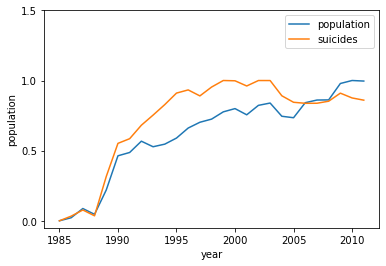

In [76]:
plt.figure('figsize' == (10,15))
sns.lineplot(population_year.year,population_year.population)
sns.lineplot(suicides_yearwise.year,suicides_yearwise.suicides_no)
plt.yticks(np.arange(0,2,0.5))
plt.legend(labels=['population', 'suicides'])
plt.show()

In [86]:
from scipy import stats
stats.spearmanr(population_year.population.to_numpy(),suicides_yearwise.suicides_no.to_numpy())[0]

0.6733821733821733

## Observation :-
`Moderately High correlation between population and suicide over the period of 25 years which is to be taken into account, we can't just say that the suicides are increasing over the past couple of years, population growth also has to do something with that and can make the suicide count look massive. `